# Classificação da capacidade de pagamento dos municípios brasileiros com base em dados geoeconômicos
# Notebook 01 - Coleta de Dados e Junção das Bases
Autores: Camila, Mario, Cruz

## 1 Configurações iniciais e carregamento de bibliotecas

### 1.1 Importação das bibliotecas

In [321]:
import pandas as pd
import numpy as np
import missingno as msno

### 1.2 Configurações iniciais

In [322]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## 2 Carregamento e análise/tratamento preliminar do Dataset com dados do PIB

### 2.1 Carregamento do dataset com dados do PIB
Fonte: https://www.ibge.gov.br/estatisticas/economicas/contas-nacionais/9088-produto-interno-bruto-dos-municipios.html?=&t=resultados  
Cabe observar que a base de dados não possui a variável 'população'.  
A base com dados do PIB foi filtrada, de forma a que constem somente dados de 2018.

In [323]:
#carregando base de dados PIB
PIB_df_2010_2018 = pd.read_excel('base_PIB dos Municípios - base de dados 2010-2018.xls')

### 2.2 Análise preliminar do dataset com dados do PIB

In [324]:
#visualizando as primeiras entradas do dataframe
PIB_df_2010_2018.head(2)

,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,Nome da Mesorregião,Código da Microrregião,Nome da Microrregião,Código da Região Geográfica Imediata,Nome da Região Geográfica Imediata,Município da Região Geográfica Imediata,Código da Região Geográfica Intermediária,Nome da Região Geográfica Intermediária,Município da Região Geográfica Intermediária,Código Concentração Urbana,Nome Concentração Urbana,Tipo Concentração Urbana,Código Arranjo Populacional,Nome Arranjo Populacional,Hierarquia Urbana,Hierarquia Urbana (principais categorias),Código da Região Rural,Nome da Região Rural,Região rural (segundo classificação do núcleo),Amazônia Legal,Semiárido,Cidade-Região de São Paulo,"Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto
0,2010,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,NaN,1102,Leste Rondoniense,11006,Cacoal,110005,Cacoal,do Entorno,1102,Ji-Paraná,do Entorno,nan,NaN,NaN,nan,NaN,Centro Local,Centro Local,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,69260.391,16118.534,62496.185,93244.656,241119.767,20957.111,262076.878,10731.180,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços
1,2010,1,Norte,11,RO,Rondônia,1100023,Ariquemes,NaN,1102,Leste Rondoniense,11003,Ariquemes,110002,Ariquemes,Polo,1101,Porto Velho,do Entorno,nan,NaN,NaN,nan,NaN,Centro Subregional B,Centro Subregional,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,73711.643,287138.585,494946.267,343867.731,1199664.227,165029.553,1364693.780,15103.860,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...


In [325]:
# Verificação dos anos disponíveis na base.
PIB_df_2010_2018['Ano'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [326]:
# Verificação da quantidade de casos por ano
PIB_df_2010_2018['Ano'].value_counts()

2015    5570
2014    5570
2013    5570
2018    5570
2017    5570
2016    5570
2012    5565
2011    5565
2010    5565
Name: Ano, dtype: int64

In [327]:
#visualizando número de linhas e colunas
PIB_df_2010_2018.shape

(50115, 43)

### 2.3 Filtragem do dataset
Foram mantidos somente os dados referentes a 2018.

In [328]:
filtro  = PIB_df_2010_2018['Ano'] > 2017
PIB_df_2018 = PIB_df_2010_2018[filtro]

In [329]:
PIB_df_2018.head(2)

,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,Nome da Mesorregião,Código da Microrregião,Nome da Microrregião,Código da Região Geográfica Imediata,Nome da Região Geográfica Imediata,Município da Região Geográfica Imediata,Código da Região Geográfica Intermediária,Nome da Região Geográfica Intermediária,Município da Região Geográfica Intermediária,Código Concentração Urbana,Nome Concentração Urbana,Tipo Concentração Urbana,Código Arranjo Populacional,Nome Arranjo Populacional,Hierarquia Urbana,Hierarquia Urbana (principais categorias),Código da Região Rural,Nome da Região Rural,Região rural (segundo classificação do núcleo),Amazônia Legal,Semiárido,Cidade-Região de São Paulo,"Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto
44545,2018,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,NaN,1102,Leste Rondoniense,11006,Cacoal,110005,Cacoal,do Entorno,1102,Ji-Paraná,do Entorno,nan,NaN,NaN,nan,NaN,Centro Local,Centro Local,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,165892.171,26369.018,123512.405,155271.086,471044.680,28261.302,499305.982,21552.470,"Administração, defesa, educação e saúde públic...",Demais serviços,"Pecuária, inclusive apoio à pecuária"
44546,2018,1,Norte,11,RO,Rondônia,1100023,Ariquemes,NaN,1102,Leste Rondoniense,11003,Ariquemes,110002,Ariquemes,Polo,1101,Porto Velho,do Entorno,nan,NaN,NaN,nan,NaN,Centro Subregional B,Centro Subregional,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,163120.731,339667.233,1034183.951,674541.006,2211512.920,252260.341,2463773.260,23206.360,Demais serviços,"Administração, defesa, educação e saúde públic...",Comércio e reparação de veículos automotores e...


In [330]:
PIB_df_2018.shape

(5570, 43)

In [331]:
PIB_df = PIB_df_2018.copy()

### 2.4 Tratamento preliminar do dataframe PIB_df

In [332]:
# Idenfiticação de todas as colunas iniciadas por 'Código'
# todos serão excluídas, exceto 'Código do Município', que será usada para posterior junção
filter_col = [col for col in PIB_df if col.startswith('Código')]
filter_col

['Código da Grande Região',
 'Código da Unidade da Federação',
 'Código do Município',
 'Código da Mesorregião',
 'Código da Microrregião',
 'Código da Região Geográfica Imediata',
 'Código da Região Geográfica Intermediária',
 'Código Concentração Urbana',
 'Código Arranjo Populacional',
 'Código da Região Rural']

In [333]:
# Eliminação de colunas desnecessárias
PIB_df.drop(['Código da Grande Região',
             'Código da Unidade da Federação',
             'Código da Mesorregião',
             'Código da Microrregião',
             'Código da Região Geográfica Imediata',
             'Código da Região Geográfica Intermediária',
             'Código Concentração Urbana',
             'Código Arranjo Populacional',
             'Código da Região Rural'],
            axis = 1, inplace = True)

In [334]:
PIB_df.head(2)

,Ano,Nome da Grande Região,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Nome da Mesorregião,Nome da Microrregião,Nome da Região Geográfica Imediata,Município da Região Geográfica Imediata,Nome da Região Geográfica Intermediária,Município da Região Geográfica Intermediária,Nome Concentração Urbana,Tipo Concentração Urbana,Nome Arranjo Populacional,Hierarquia Urbana,Hierarquia Urbana (principais categorias),Nome da Região Rural,Região rural (segundo classificação do núcleo),Amazônia Legal,Semiárido,Cidade-Região de São Paulo,"Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto
44545,2018,Norte,RO,Rondônia,1100015,Alta Floresta D'Oeste,NaN,Leste Rondoniense,Cacoal,Cacoal,do Entorno,Ji-Paraná,do Entorno,NaN,NaN,NaN,Centro Local,Centro Local,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,165892.171,26369.018,123512.405,155271.086,471044.680,28261.302,499305.982,21552.470,"Administração, defesa, educação e saúde públic...",Demais serviços,"Pecuária, inclusive apoio à pecuária"
44546,2018,Norte,RO,Rondônia,1100023,Ariquemes,NaN,Leste Rondoniense,Ariquemes,Ariquemes,Polo,Porto Velho,do Entorno,NaN,NaN,NaN,Centro Subregional B,Centro Subregional,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,163120.731,339667.233,1034183.951,674541.006,2211512.920,252260.341,2463773.260,23206.360,Demais serviços,"Administração, defesa, educação e saúde públic...",Comércio e reparação de veículos automotores e...


### 2.5 Análise exploratória e tratamento de Missing Values
Referência: https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009#:~:text=The%20missingno%20Library,%2C%20heatmap%2C%20or%20a%20dendrogram.

#### 2.5.1 - Análise Exploratória dos missing values

In [335]:
df_missing = pd.DataFrame(PIB_df.isna().sum(), columns = ['Missing'])
df_missing[df_missing['Missing']>0]

,Missing
Região Metropolitana,4181
Nome Concentração Urbana,4910
Tipo Concentração Urbana,4910
Nome Arranjo Populacional,4614


In [336]:
df_missing2 = PIB_df[['Região Metropolitana','Nome Concentração Urbana','Tipo Concentração Urbana','Nome Arranjo Populacional']]
[df_missing2[col].name for col in df_missing2], [df_missing2[col].nunique() for col in df_missing2]
#df_missing2

(['Região Metropolitana',
  'Nome Concentração Urbana',
  'Tipo Concentração Urbana',
  'Nome Arranjo Populacional'],
 [81, 185, 2, 294])

In [337]:
PIB_df['Tipo Concentração Urbana'].value_counts(dropna = False)

NaN                           4910
Média concentração urbana      383
Grande concentração urbana     277
Name: Tipo Concentração Urbana, dtype: int64

In [338]:
PIB_df['Região Metropolitana'].value_counts(dropna=False)

NaN                                                                                       4181
RM Belo Horizonte                                                                           50
RM do Extremo Oeste                                                                         49
RM do Contestado                                                                            45
RM São Paulo                                                                                39
RM do Vale do Paraíba e Litoral Norte                                                       39
RM Ribeirão Preto                                                                           34
RM Porto Alegre                                                                             34
RM Chapecó                                                                                  32
RM Curitiba                                                                                 29
RM do Alto Vale do Itajaí                         

In [339]:
PIB_df['Região Metropolitana'].nunique()

81

<AxesSubplot:>

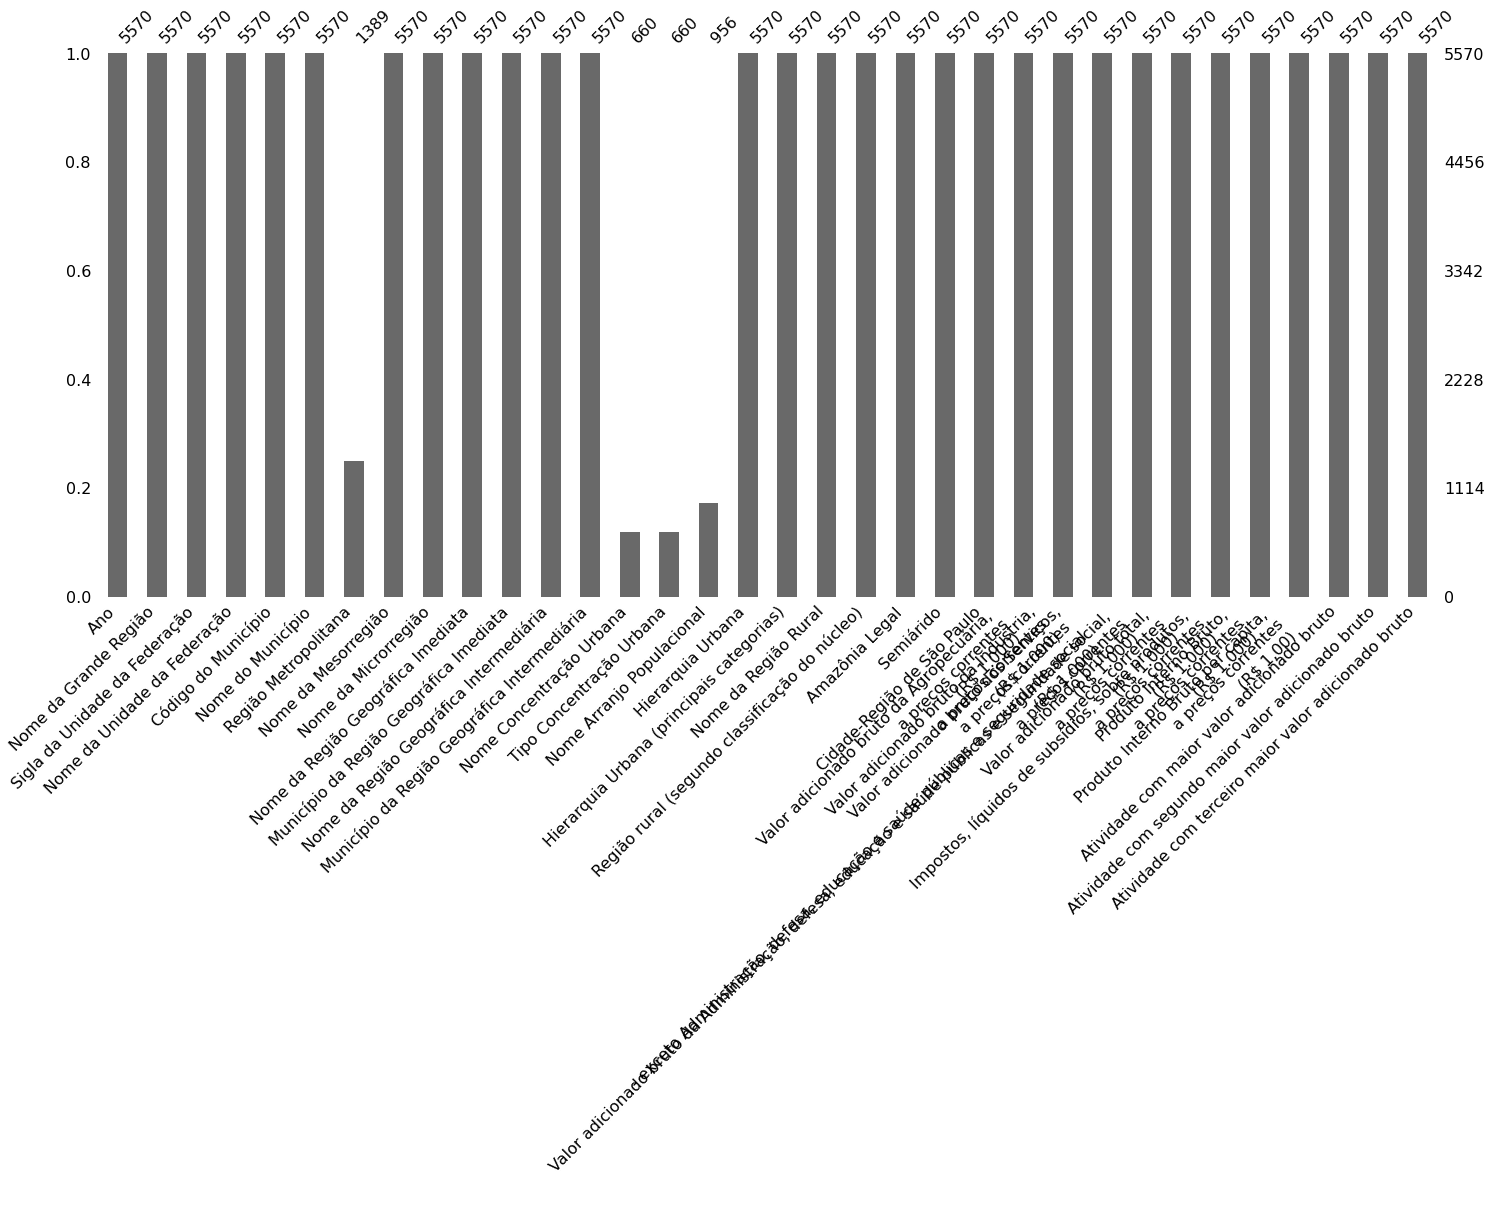

In [340]:
msno.bar(PIB_df)

<AxesSubplot:>

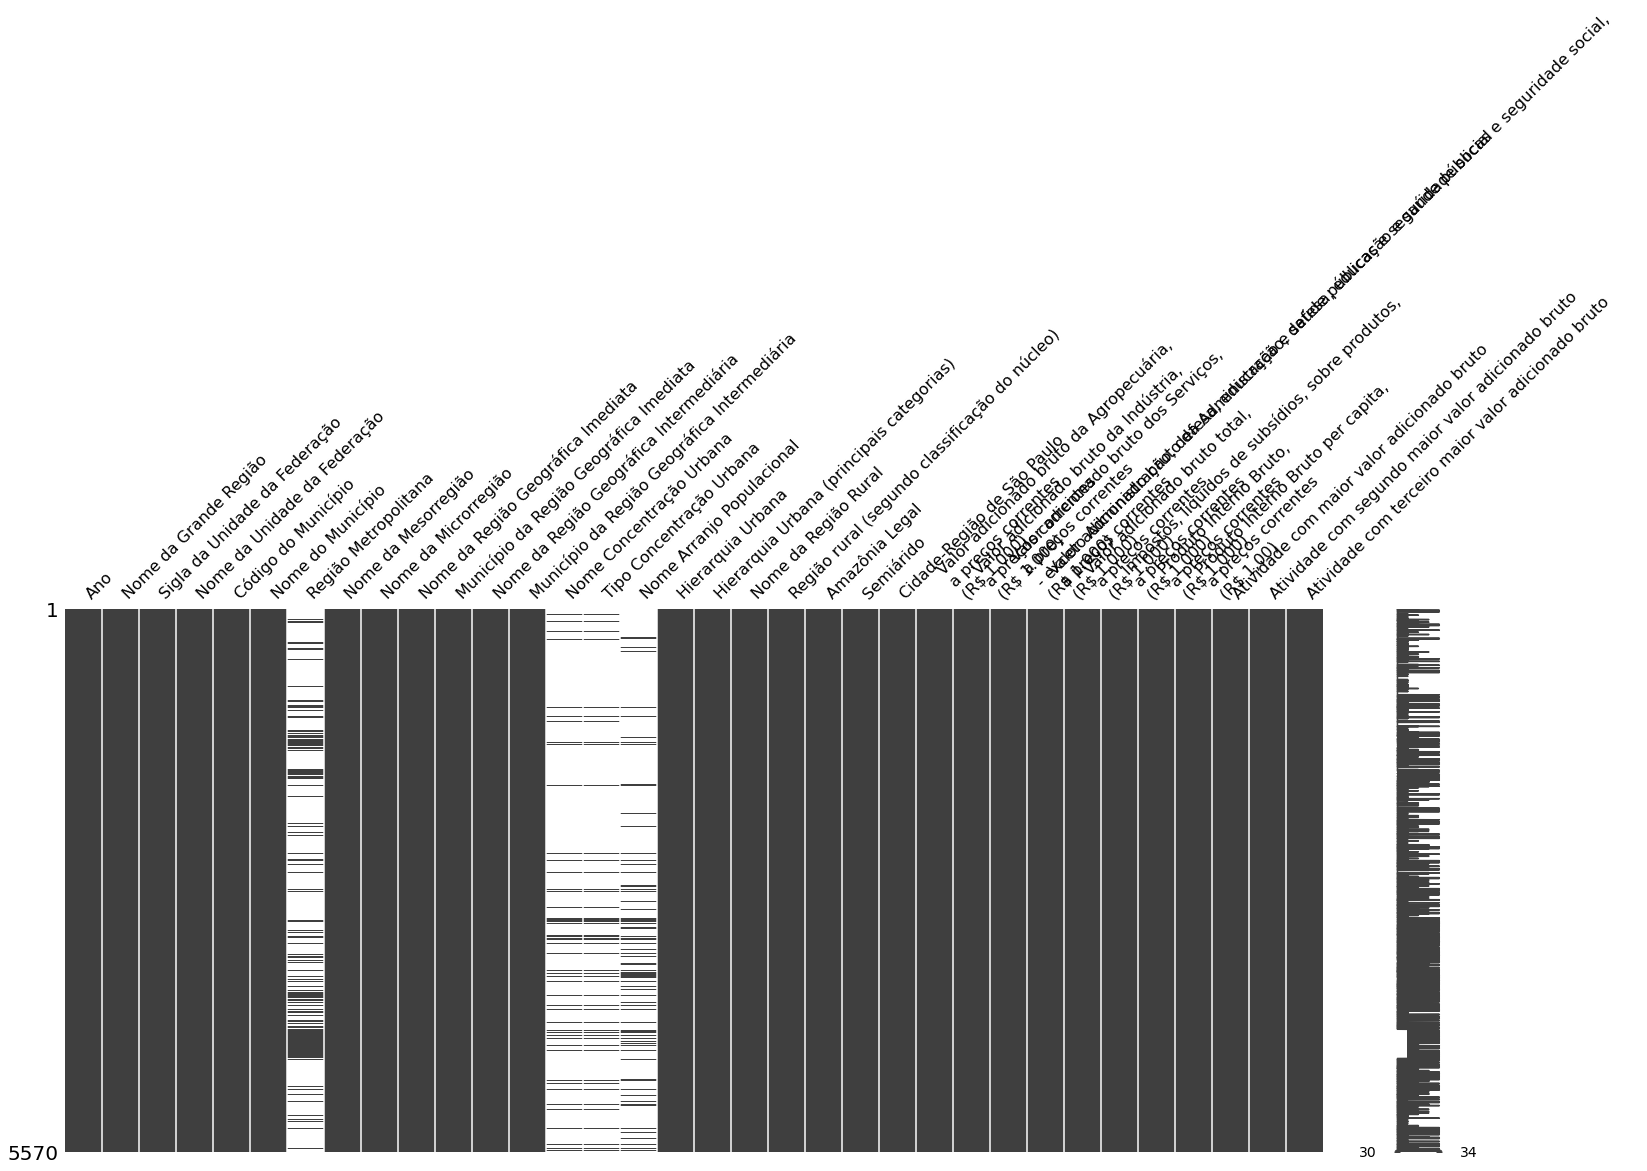

In [341]:
msno.matrix(PIB_df)

<AxesSubplot:>

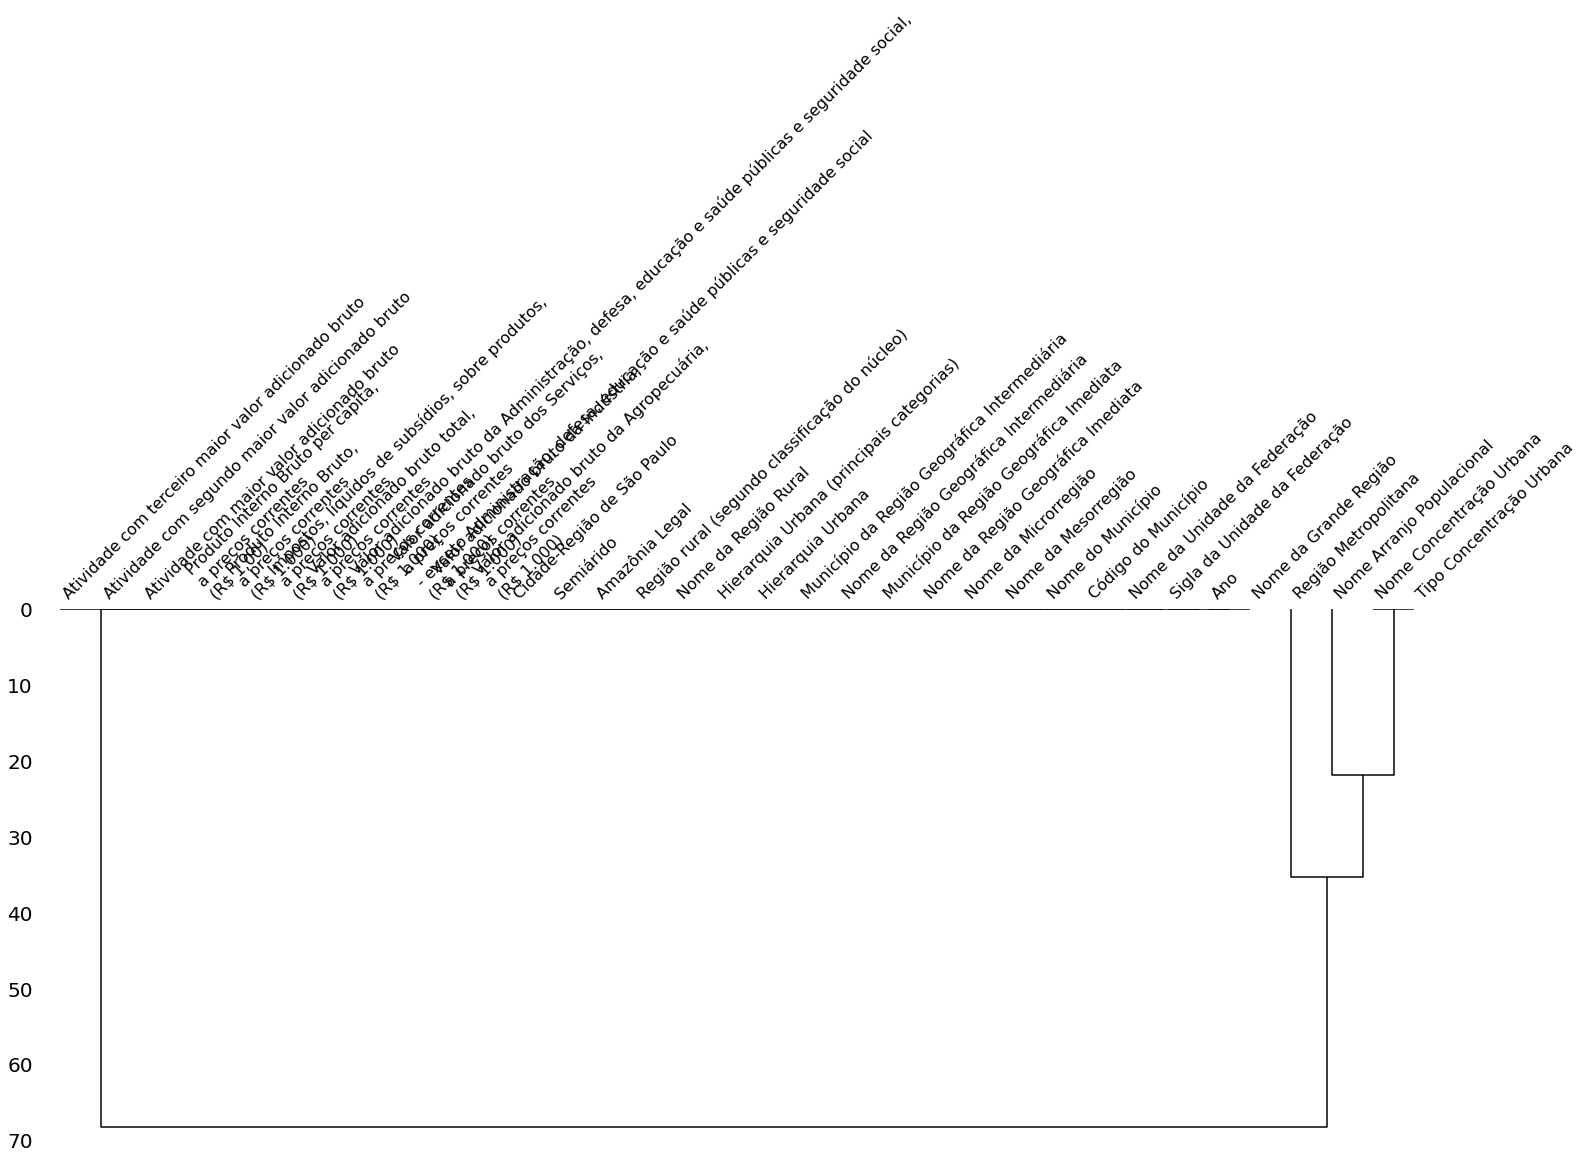

In [342]:
msno.dendrogram(PIB_df)

In [343]:
df_missing = pd.DataFrame(PIB_df.isna().sum(), columns = ['Missing'])
df_missing[df_missing['Missing']>0]

,Missing
Região Metropolitana,4181
Nome Concentração Urbana,4910
Tipo Concentração Urbana,4910
Nome Arranjo Populacional,4614


#### 2.5.2 Conclusões sobre os Missing Values
Verifica-se que as quatro colunas nominadas possuem uma quantidade muito elevada de missing values.  
'Nome Concentração Urbana' e 'Tipo Concentração Urbana' possuem correlação dos missing values igual a 1, o que permite concluir que uma delas pode ser excluída sem perda de informação. Como se trata de variáveis qualitativas, não é cabível falar em correlação, mas entendemos que a saída do algoritmo foi útil.  
'Nome Concentração Urbana' possui 185 valores únicos, ao passo que 'Tipo Concentração Urbana' possui 2 Valores únicos, além dos missing values.  
Dessa forma, excluiremos a variável 'Nome Concentração Urbana'.  
Quanto a 'Tipo Concentração Urbana', imputaremos a categoria 'Miss' para os valores faltantes e, posteriormente, converteremos em dummies.  
'Região Metropolitana' possui 81 valores únicos, o que dificulta a codificação numérica. Dessa forma, vamos transformá-la em uma variável dummy, onde 1 será o valor válido 'pertence a Região Metropolitana' e 0 será o missing value (não pertence a Região Metropolitana).  
'Nome Arranjo Populacional' possui 294 valores únicos, indicando cardinalidade elevada, e muitos missing values. Decidimos excluir esta variável.

#### 2.5.3 Tratamento das variáveis 'Tipo Concentração Urbana' e 'Nome Concentração Urbana'
A variável 'Nome Concentração Urbana' será excluída.  
A varivável 'Tipo Concentração Urbana' terá seus missing values imputados pela categoria 'Miss'.

In [344]:
PIB_df.drop(['Nome Concentração Urbana'], axis = 1,inplace = True)
PIB_df['Tipo Concentração Urbana'].fillna('Miss', inplace = True)
PIB_df['Tipo Concentração Urbana'].value_counts()

Miss                          4910
Média concentração urbana      383
Grande concentração urbana     277
Name: Tipo Concentração Urbana, dtype: int64

In [345]:
df_missing = pd.DataFrame(PIB_df.isna().sum(), columns = ['Missing'])
df_missing[df_missing['Missing']>0]

,Missing
Região Metropolitana,4181
Nome Arranjo Populacional,4614


#### 2.5.4 Tratamento da variável 'Região Metropolitana'

In [346]:
PIB_df['Região Metropolitana'].head(20)

44545               NaN
44546               NaN
44547               NaN
44548               NaN
44549               NaN
44550               NaN
44551               NaN
44552               NaN
44553               NaN
44554               NaN
44555               NaN
44556               NaN
44557               NaN
44558               NaN
44559               NaN
44560               NaN
44561    RM Porto Velho
44562               NaN
44563               NaN
44564               NaN
Name: Região Metropolitana, dtype: object

In [347]:
PIB_df['Região Metropolitana'].nunique()

81

In [348]:
# Como a variável 'Região Metropolitana' possui 81 valores únicos, entendemos não ser adequado converter em dummies, pois geraria 80 colunas adicionais ao dataset.
# Dessa forma, vamos transformá-la em uma variável categórica dummy com somente duas categorias, sendo 1 igual valor válido e 0 igual missing value.
PIB_df['Região Metropolitana'] = PIB_df['Região Metropolitana'].notna().astype(int)
PIB_df['Região Metropolitana'].value_counts()

0    4181
1    1389
Name: Região Metropolitana, dtype: int64

#### 2.5.5 Variável 'Arranjo Populacional'

In [349]:
df_missing = pd.DataFrame(PIB_df.isna().sum(), columns = ['Missing'])
df_missing[df_missing['Missing']>0]

,Missing
Nome Arranjo Populacional,4614


In [350]:
PIB_df['Nome Arranjo Populacional'].value_counts(dropna=False)

NaN                                                                                     4614
São Paulo/SP                                                                              37
Belo Horizonte/MG                                                                         23
Rio de Janeiro/RJ                                                                         21
Curitiba/PR                                                                               18
Recife/PE                                                                                 15
Goiânia/GO                                                                                15
Presidente Prudente/SP                                                                    12
Porto Alegre/RS                                                                           12
São José do Rio Preto/SP                                                                  12
Aracaju/SE                                                            

In [351]:
PIB_df['Nome Arranjo Populacional'].nunique()

294

In [352]:
PIB_df.drop(['Nome Arranjo Populacional'],axis = 1, inplace = True)

#### 2.5.6 Conferência final de missing values
Verifica-se que não sobraram missing values na base PIB_df.

In [353]:
df_missing = pd.DataFrame(PIB_df.isna().sum(), columns = ['Missing'])
df_missing[df_missing['Missing']>0]

,Missing


### 2.6 Verificação das demais variáveis

In [354]:
PIB_df.head(2)

,Ano,Nome da Grande Região,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Nome da Mesorregião,Nome da Microrregião,Nome da Região Geográfica Imediata,Município da Região Geográfica Imediata,Nome da Região Geográfica Intermediária,Município da Região Geográfica Intermediária,Tipo Concentração Urbana,Hierarquia Urbana,Hierarquia Urbana (principais categorias),Nome da Região Rural,Região rural (segundo classificação do núcleo),Amazônia Legal,Semiárido,Cidade-Região de São Paulo,"Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto
44545,2018,Norte,RO,Rondônia,1100015,Alta Floresta D'Oeste,0,Leste Rondoniense,Cacoal,Cacoal,do Entorno,Ji-Paraná,do Entorno,Miss,Centro Local,Centro Local,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,165892.171,26369.018,123512.405,155271.086,471044.680,28261.302,499305.982,21552.470,"Administração, defesa, educação e saúde públic...",Demais serviços,"Pecuária, inclusive apoio à pecuária"
44546,2018,Norte,RO,Rondônia,1100023,Ariquemes,0,Leste Rondoniense,Ariquemes,Ariquemes,Polo,Porto Velho,do Entorno,Miss,Centro Subregional B,Centro Subregional,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,163120.731,339667.233,1034183.951,674541.006,2211512.920,252260.341,2463773.260,23206.360,Demais serviços,"Administração, defesa, educação e saúde públic...",Comércio e reparação de veículos automotores e...


In [355]:
PIB_df['Cidade-Região de São Paulo'].value_counts()

Não    5478
Sim      92
Name: Cidade-Região de São Paulo, dtype: int64

### 2.7 Verificação da quantidade de valores únicos das variáveis categóricas
Será excluída a variável 'Ano', por ter cardinalidade igual a 1, não possuindo poder preditivo.  
Serão excluídas todas as variáveis iniciadas por Código, por serem redundantes, com exceção do Código de Município, que será utilizado para junção com a outra base.

In [356]:
pd.DataFrame([(PIB_df[col].name, PIB_df[col].nunique()) for col in PIB_df.columns],
             columns = ['Variável','Qtde_valores_únicos']
            ).sort_values(by="Qtde_valores_únicos", ascending = False)

,Variável,Qtde_valores_únicos
26,"Impostos, líquidos de subsídios, sobre produto...",5570
23,"Valor adicionado bruto dos Serviços,\na preços...",5570
24,"Valor adicionado bruto da Administração, defes...",5570
4,Código do Município,5570
25,"Valor adicionado bruto total, \na preços corre...",5570
27,"Produto Interno Bruto, \na preços correntes\n(...",5570
22,"Valor adicionado bruto da Indústria,\na preços...",5569
21,"Valor adicionado bruto da Agropecuária, \na pr...",5569
28,"Produto Interno Bruto per capita, \na preços c...",5567
5,Nome do Município,5298


In [357]:
PIB_df[['Código do Município','Nome do Município']].isna().sum()

Código do Município    0
Nome do Município      0
dtype: int64

### 2.8 Verificação de municípios com mesmo nome
Conclui-se que há municípios com mesmo nome em unidades da federação distintas.

In [358]:
PIB_df['Nome do Município'].value_counts()

São Domingos                        5
Bom Jesus                           5
Santa Helena                        4
Vera Cruz                           4
Planalto                            4
Santa Terezinha                     4
Santa Luzia                         4
São Francisco                       4
Bonito                              4
Santa Inês                          4
Cruzeiro do Sul                     3
Bom Sucesso                         3
Alto Alegre                         3
Jussara                             3
Cantagalo                           3
Água Branca                         3
Itambé                              3
Bom Jardim                          3
Santa Cruz                          3
Ouro Branco                         3
Viçosa                              3
Triunfo                             3
Nova Olinda                         3
Boa Esperança                       3
Novo Horizonte                      3
Mundo Novo                          3
Belém       

In [359]:
# Verifica-se que há municípios de mesmo nome em unidades da federação distintas.
PIB_df[PIB_df['Nome do Município']=='São Domingos'].head(3)

,Ano,Nome da Grande Região,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Nome da Mesorregião,Nome da Microrregião,Nome da Região Geográfica Imediata,Município da Região Geográfica Imediata,Nome da Região Geográfica Intermediária,Município da Região Geográfica Intermediária,Tipo Concentração Urbana,Hierarquia Urbana,Hierarquia Urbana (principais categorias),Nome da Região Rural,Região rural (segundo classificação do núcleo),Amazônia Legal,Semiárido,Cidade-Região de São Paulo,"Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto
45967,2018,Nordeste,PB,Paraíba,2513968,São Domingos,0,Sertão Paraibano,Sousa,Pombal,do Entorno,Patos,do Entorno,Miss,Centro Local,Centro Local,Região Rural dos Centros Sub-regionais de Caja...,Região Rural de Centro Sub-regional,Não,Sim,Não,3411.378,1064.649,5060.710,18600.217,28136.954,834.911,28971.865,9385.120,"Administração, defesa, educação e saúde públic...",Demais serviços,"Pecuária, inclusive apoio à pecuária"
46363,2018,Nordeste,SE,Sergipe,2806800,São Domingos,0,Agreste Sergipano,Agreste de Itabaiana,Itabaiana,do Entorno,Itabaiana,do Entorno,Miss,Centro Local,Centro Local,Região Rural da Capital Regional de Aracaju,Região Rural de Capital Regional,Não,Não,Não,4829.342,13664.191,26406.840,51700.736,96601.109,5688.904,102290.012,9244.470,"Administração, defesa, educação e saúde públic...",Demais serviços,Construção
46724,2018,Nordeste,BA,Bahia,2928950,São Domingos,0,Nordeste Baiano,Serrinha,Conceição do Coité,do Entorno,Feira de Santana,do Entorno,Miss,Centro Local,Centro Local,Região Rural da Metrópole de Salvador,Região Rural de Metrópole,Não,Sim,Não,7227.390,5887.318,21789.548,31888.683,66792.940,3335.860,70128.799,7755.890,"Administração, defesa, educação e saúde públic...",Demais serviços,"Pecuária, inclusive apoio à pecuária"


In [360]:
columns = [#'Nome da Microrregião',#'Nome da Região Geográfica Imediata',
           #'Nome da Região Geográfica Intermediária',
           #'Município da Região Geográfica Imediata',
           #'Município da Região Geográfica Intermediária',
           'Hierarquia Urbana','Hierarquia Urbana (principais categorias)','Nome da Região Rural','Região rural (segundo classificação do núcleo)',\
           'Amazônia Legal','Semiárido','Cidade-Região de São Paulo','Atividade com maior valor adicionado bruto',
           'Município da Região Geográfica Imediata','Município da Região Geográfica Intermediária' ]
[print(PIB_df[column].value_counts(normalize = True)) for column in columns]

Centro Local                       0.804
Centro de Zona B                   0.065
Centro de Zona A                   0.034
Integrante de Metrópole            0.030
Centro Subregional A               0.015
Centro Subregional B               0.014
Integrante de Capital Regional A   0.009
Integrante de Capital Regional C   0.006
Capital Regional C                 0.005
Integrante de Capital Regional B   0.004
Núcleo de Capital Regional C       0.003
Núcleo de Metrópole                0.002
Núcleo de Capital Regional B       0.002
Núcleo de Capital Regional A       0.002
Capital Regional B                 0.002
Integrante de Centro de Zona A     0.001
Núcleo de Centro de Zona A         0.000
Name: Hierarquia Urbana, dtype: float64
Centro Local         0.804
Centro de Zona       0.101
Capital Regional     0.034
Metrópole            0.032
Centro Subregional   0.029
Name: Hierarquia Urbana (principais categorias), dtype: float64
Região Rural da Capital Regional de Passo Fundo                 

[None, None, None, None, None, None, None, None, None, None]

In [361]:
PIB_df.head(1)

,Ano,Nome da Grande Região,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Nome da Mesorregião,Nome da Microrregião,Nome da Região Geográfica Imediata,Município da Região Geográfica Imediata,Nome da Região Geográfica Intermediária,Município da Região Geográfica Intermediária,Tipo Concentração Urbana,Hierarquia Urbana,Hierarquia Urbana (principais categorias),Nome da Região Rural,Região rural (segundo classificação do núcleo),Amazônia Legal,Semiárido,Cidade-Região de São Paulo,"Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto
44545,2018,Norte,RO,Rondônia,1100015,Alta Floresta D'Oeste,0,Leste Rondoniense,Cacoal,Cacoal,do Entorno,Ji-Paraná,do Entorno,Miss,Centro Local,Centro Local,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,165892.171,26369.018,123512.405,155271.086,471044.680,28261.302,499305.982,21552.470,"Administração, defesa, educação e saúde públic...",Demais serviços,"Pecuária, inclusive apoio à pecuária"


### 2.9 Eliminação de colunas desnecessárias
Foi excluída a coluna 'Ano', com cardinalidade igual a 1.  
Também foram excluídas variáveis com cardinalidade muito elevada.

In [362]:
#descartando as colunas que não serão usadas por conterem informações irrelevantes para o trabalho, redundantes 
PIB_df.drop(columns=[
    'Ano',
    'Sigla da Unidade da Federação',
    'Nome da Microrregião',
    'Nome da Região Geográfica Imediata',
    'Nome da Região Geográfica Intermediária',
    'Nome da Mesorregião',
    'Nome da Região Rural',
    'Atividade com maior valor adicionado bruto',
    'Atividade com segundo maior valor adicionado bruto',
    'Atividade com terceiro maior valor adicionado bruto',
    'Produto Interno Bruto, \na preços correntes\n(R$ 1.000)'
                    ], axis=1, inplace=True)

In [363]:
#lista o nome das colunas restantes
list(PIB_df.columns)

['Nome da Grande Região',
 'Nome da Unidade da Federação',
 'Código do Município',
 'Nome do Município',
 'Região Metropolitana',
 'Município da Região Geográfica Imediata',
 'Município da Região Geográfica Intermediária',
 'Tipo Concentração Urbana',
 'Hierarquia Urbana',
 'Hierarquia Urbana (principais categorias)',
 'Região rural (segundo classificação do núcleo)',
 'Amazônia Legal',
 'Semiárido',
 'Cidade-Região de São Paulo',
 'Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)',
 'Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)',
 'Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)',
 'Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)',
 'Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)',
 'Impostos, líquidos de subsídios, sobre produtos, \na preços 

In [364]:
#renomeia as colunas da base PIB
PIB_df = PIB_df.rename(columns={
    'Nome da Grande Região':'Região',
    'Nome da Unidade da Federação':'UF',
    'Nome do Município':'Município',
    'Código do Município':'Cód_Município',
    'Região Metropolitana':'Reg_Metropolitana',
    'Município da Região Geográfica Imediata':'Mun_Reg_Geog_Imediata',
    'Município da Região Geográfica Intermediária':'Mun_Reg_Geog_Intermediária',
    'Tipo Concentração Urbana':'Tipo_Conc_Urbana',
    'Hierarquia Urbana':'Hierarquia_Urbana',
    'Hierarquia Urbana (principais categorias)':'Hier_Urbana_princ_categ',
    'Região rural (segundo classificação do núcleo)':'Região_rural',
    'Amazônia Legal':'Amazônia_Legal',
    'Semiárido':'Semiárido',
    'Cidade-Região de São Paulo':'Cid_Região_São_Paulo',
    'Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)':'VAB_AGR',
    'Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)':'VAB_IND',
    'Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)':'VAB_SERV',
    'Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)':'VAB_AD_DF_ED_SP_SS',
    'Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)':'VAB_TOT',
    'Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)':'IMP_PROD',
    'Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)':'PIB_PERC'})

In [365]:
#lista o nome das colunas da base PIB
list(PIB_df.columns)

['Região',
 'UF',
 'Cód_Município',
 'Município',
 'Reg_Metropolitana',
 'Mun_Reg_Geog_Imediata',
 'Mun_Reg_Geog_Intermediária',
 'Tipo_Conc_Urbana',
 'Hierarquia_Urbana',
 'Hier_Urbana_princ_categ',
 'Região_rural',
 'Amazônia_Legal',
 'Semiárido',
 'Cid_Região_São_Paulo',
 'VAB_AGR',
 'VAB_IND',
 'VAB_SERV',
 'VAB_AD_DF_ED_SP_SS',
 'VAB_TOT',
 'IMP_PROD',
 'PIB_PERC']

In [366]:
PIB_df.head(2)

,Região,UF,Cód_Município,Município,Reg_Metropolitana,Mun_Reg_Geog_Imediata,Mun_Reg_Geog_Intermediária,Tipo_Conc_Urbana,Hierarquia_Urbana,Hier_Urbana_princ_categ,Região_rural,Amazônia_Legal,Semiárido,Cid_Região_São_Paulo,VAB_AGR,VAB_IND,VAB_SERV,VAB_AD_DF_ED_SP_SS,VAB_TOT,IMP_PROD,PIB_PERC
44545,Norte,Rondônia,1100015,Alta Floresta D'Oeste,0,do Entorno,do Entorno,Miss,Centro Local,Centro Local,Região Rural de Capital Regional,Sim,Não,Não,165892.171,26369.018,123512.405,155271.086,471044.680,28261.302,21552.470
44546,Norte,Rondônia,1100023,Ariquemes,0,Polo,do Entorno,Miss,Centro Subregional B,Centro Subregional,Região Rural de Capital Regional,Sim,Não,Não,163120.731,339667.233,1034183.951,674541.006,2211512.920,252260.341,23206.360


## 3 Carregamento e análise preliminar do dataset com dados sobre a capacidade de pagamento dos municípios (CAPAG)
Fonte: http://www.tesourotransparente.gov.br/ckan/dataset/capag-municipios  
A base "CAPAG" contém a classificação da capacidade de pagamento dos municípios brasileiros.

### 3.1 Carregamento da base CAPAG

In [367]:
CAPAG_df = pd.read_excel('base_CAPAGMunicipios.xlsx')

### 3.2 Verificação e tratamento inicial da base CAPAG

In [368]:
CAPAG_df.head()

,Município,Cod.IBGE,UF,População,Indicador_1,Nota_1,Indicador_2,Nota_2,Indicador_3,Nota_3,Classificação_CAPAG,Indicador_1_Revisão,Nota_1_Revisão,Indicador_2_Revisão,Nota_2_Revisão,Indicador_3_Revisão,Nota_3_Revisão,CAPAG_Revisão,CAPAG_Oficial
0,Abadia de Goiás - GO,5200050,GO,8773.000,0.081,A,0.893,A,0.541,A,A,nan,NaN,nan,NaN,nan,NaN,NaN,A
1,Abadia dos Dourados - MG,3100104,MG,6989.000,0.127,A,0.884,A,0.162,A,A,nan,NaN,nan,NaN,nan,NaN,NaN,A
2,Abadiânia - GO,5200100,GO,20042.000,0.189,A,0.947,B,2.226,C,C,nan,NaN,nan,NaN,nan,NaN,NaN,C
3,Abaeté - MG,3100203,MG,23237.000,0.256,A,0.828,A,0.177,A,A,nan,NaN,nan,NaN,nan,NaN,NaN,A
4,Abaetetuba - PA,1500107,PA,156292.000,0.032,A,0.961,C,0.882,A,C,nan,NaN,nan,NaN,nan,NaN,NaN,C


In [369]:
# Verificação dos valores faltantes da variável CAPAG
# Verifica-se que há 121 municípios sem o valor da população informado, o que vai nos obrigar a buscar esta informação em outro local.
# Há várias variáveis com missing values, mas a maioria não será utilizada.
CAPAG_df.isna().sum()

Município                 0
Cod.IBGE                  0
UF                        0
População               121
Indicador_1             181
Nota_1                    0
Indicador_2             224
Nota_2                    0
Indicador_3             766
Nota_3                    0
Classificação_CAPAG       0
Indicador_1_Revisão    5324
Nota_1_Revisão         5276
Indicador_2_Revisão    5317
Nota_2_Revisão         5276
Indicador_3_Revisão    5338
Nota_3_Revisão         5276
CAPAG_Revisão          5276
CAPAG_Oficial             0
dtype: int64

In [370]:
CAPAG_df.head()

,Município,Cod.IBGE,UF,População,Indicador_1,Nota_1,Indicador_2,Nota_2,Indicador_3,Nota_3,Classificação_CAPAG,Indicador_1_Revisão,Nota_1_Revisão,Indicador_2_Revisão,Nota_2_Revisão,Indicador_3_Revisão,Nota_3_Revisão,CAPAG_Revisão,CAPAG_Oficial
0,Abadia de Goiás - GO,5200050,GO,8773.000,0.081,A,0.893,A,0.541,A,A,nan,NaN,nan,NaN,nan,NaN,NaN,A
1,Abadia dos Dourados - MG,3100104,MG,6989.000,0.127,A,0.884,A,0.162,A,A,nan,NaN,nan,NaN,nan,NaN,NaN,A
2,Abadiânia - GO,5200100,GO,20042.000,0.189,A,0.947,B,2.226,C,C,nan,NaN,nan,NaN,nan,NaN,NaN,C
3,Abaeté - MG,3100203,MG,23237.000,0.256,A,0.828,A,0.177,A,A,nan,NaN,nan,NaN,nan,NaN,NaN,A
4,Abaetetuba - PA,1500107,PA,156292.000,0.032,A,0.961,C,0.882,A,C,nan,NaN,nan,NaN,nan,NaN,NaN,C


In [371]:
CAPAG_df['Classificação_CAPAG'].value_counts()

C       2183
A       1321
n.d.    1079
B        980
D          6
Name: Classificação_CAPAG, dtype: int64

In [372]:
CAPAG_df['CAPAG_Oficial'].value_counts()

C       2222
A       1269
n.d.    1151
B        921
D          6
Name: CAPAG_Oficial, dtype: int64

In [373]:
# Selecionando colunas de interesse
CAPAG_df = CAPAG_df[['Cod.IBGE', 'CAPAG_Oficial']]

In [374]:
#Substitui 'n.d.' por vazio na coluna 'Classificação da CAPAG'
dict={'n.d.': np.nan}
CAPAG_df['CAPAG_Oficial'] = CAPAG_df['CAPAG_Oficial'].replace(dict)

In [375]:
#renomeia colunas
CAPAG_df = CAPAG_df.rename(columns={'CAPAG_Oficial':'Capag',
                                   'PIB_PERC':'PIB_per_capita'})                                                                  

In [376]:
#lista o nome das colunas da base CAPAG
list(CAPAG_df.columns)

['Cod.IBGE', 'Capag']

In [377]:
CAPAG_df.head(3)

,Cod.IBGE,Capag
0,5200050,A
1,3100104,A
2,5200100,C


## 4 Importação e tratamento inicial da base com dados sobre população
O único objetivo de importarmos esta base é a obtenção da variável 'população', pois não consta da base PIB_df e consta com valores faltantes na base CAPAG_df.  
Origem dos dados: https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?edicao=17283&t=downloads  
Outra fonte possível: http://blog.mds.gov.br/redesuas/lista-de-municipios-brasileiros/  

In [378]:
#pop_df = pd.read_excel('base_Lista-de-Municípios-com-IBGE-Brasil.xlsx', sheet_name = 'Lista de Municípios IBGE', header= 0)
pop_df = pd.read_excel('base_POP2018_20210331_copia.xls', 
                       sheet_name = 'Municípios',
                       skiprows = 1, # Pular a primeira linha, que tem o título da tabela
                       header= 0, # Pegar títulos das colunas na linha 0 (pulando a anterior),
                       nrows = 5570 # Ler somente as linhas com informação de população normal. As linhas abaixo têm outro
                                    #formato e referem-se a populações determinadas judicialmente.
                      )

In [379]:
pop_df.tail(2)

,UF,COD. UF,COD. MUNIC,IBGE7,NOME DO MUNICÍPIO,POPULAÇÃO ESTIMADA,POPULAÇÃO JUDICIAL
5568,GO,52,22302,5222302,Vila Propício,5758,nan
5569,DF,53,108,5300108,Brasília,2974703,nan


In [380]:
pop_df.shape

(5570, 7)

In [381]:
pop_df = pop_df[['IBGE7','POPULAÇÃO ESTIMADA']]
pop_df.head()

,IBGE7,POPULAÇÃO ESTIMADA
0,1100015,23167
1,1100023,106168
2,1100031,5438
3,1100049,84813
4,1100056,16444


In [382]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   IBGE7               5570 non-null   int64
 1   POPULAÇÃO ESTIMADA  5570 non-null   int64
dtypes: int64(2)
memory usage: 87.2 KB


In [383]:
pop_df.isna().sum()

IBGE7                 0
POPULAÇÃO ESTIMADA    0
dtype: int64

In [384]:
# Abaixo confirma-se que não há valores nulos
pop_df[pop_df['IBGE7'].isnull()]

,IBGE7,POPULAÇÃO ESTIMADA


In [385]:
pop_df.dropna(axis = 0, inplace = True)

In [386]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 0 to 5569
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   IBGE7               5570 non-null   int64
 1   POPULAÇÃO ESTIMADA  5570 non-null   int64
dtypes: int64(2)
memory usage: 130.5 KB


In [387]:
pop_df.head(2)

,IBGE7,POPULAÇÃO ESTIMADA
0,1100015,23167
1,1100023,106168


In [388]:
pop_df['IBGE7'] = pop_df['IBGE7'].astype(int)
#pop_df['POPULAÇÃO ESTIMADA'] = pop_df['POPULAÇÃO ESTIMADA'].astype(int)

In [389]:
pop_df.head(2)

,IBGE7,POPULAÇÃO ESTIMADA
0,1100015,23167
1,1100023,106168


## 5 União das bases PIB_df e pop_df

In [390]:
# Abaixo verifica-se que as chaves primárias das duas tabelas que vamos unir estão exatamente no mesmo formato.
PIB_df['Cód_Município'].dtype, pop_df['IBGE7'].dtype

(dtype('int64'), dtype('int32'))

In [391]:
PIB_df.columns, pop_df.columns

(Index(['Região', 'UF', 'Cód_Município', 'Município', 'Reg_Metropolitana',
        'Mun_Reg_Geog_Imediata', 'Mun_Reg_Geog_Intermediária',
        'Tipo_Conc_Urbana', 'Hierarquia_Urbana', 'Hier_Urbana_princ_categ',
        'Região_rural', 'Amazônia_Legal', 'Semiárido', 'Cid_Região_São_Paulo',
        'VAB_AGR', 'VAB_IND', 'VAB_SERV', 'VAB_AD_DF_ED_SP_SS', 'VAB_TOT',
        'IMP_PROD', 'PIB_PERC'],
       dtype='object'),
 Index(['IBGE7', 'POPULAÇÃO ESTIMADA'], dtype='object'))

In [392]:
PIB_df['Cód_Município'].head(), pop_df['IBGE7'].head()

(44545    1100015
 44546    1100023
 44547    1100031
 44548    1100049
 44549    1100056
 Name: Cód_Município, dtype: int64,
 0    1100015
 1    1100023
 2    1100031
 3    1100049
 4    1100056
 Name: IBGE7, dtype: int32)

In [393]:
PIB_df['Cód_Município'].isna().sum(), pop_df['IBGE7'].isna().sum()

(0, 0)

In [394]:
PIB_df_com_populacao = pd.merge(PIB_df, pop_df, how = 'left', 
                      left_on=['Cód_Município'],
                      right_on =['IBGE7'])
PIB_df_com_populacao.head(2)

,Região,UF,Cód_Município,Município,Reg_Metropolitana,Mun_Reg_Geog_Imediata,Mun_Reg_Geog_Intermediária,Tipo_Conc_Urbana,Hierarquia_Urbana,Hier_Urbana_princ_categ,Região_rural,Amazônia_Legal,Semiárido,Cid_Região_São_Paulo,VAB_AGR,VAB_IND,VAB_SERV,VAB_AD_DF_ED_SP_SS,VAB_TOT,IMP_PROD,PIB_PERC,IBGE7,POPULAÇÃO ESTIMADA
0,Norte,Rondônia,1100015,Alta Floresta D'Oeste,0,do Entorno,do Entorno,Miss,Centro Local,Centro Local,Região Rural de Capital Regional,Sim,Não,Não,165892.171,26369.018,123512.405,155271.086,471044.680,28261.302,21552.470,1100015,23167
1,Norte,Rondônia,1100023,Ariquemes,0,Polo,do Entorno,Miss,Centro Subregional B,Centro Subregional,Região Rural de Capital Regional,Sim,Não,Não,163120.731,339667.233,1034183.951,674541.006,2211512.920,252260.341,23206.360,1100023,106168


In [395]:
PIB_df_com_populacao.isna().sum()

Região                        0
UF                            0
Cód_Município                 0
Município                     0
Reg_Metropolitana             0
Mun_Reg_Geog_Imediata         0
Mun_Reg_Geog_Intermediária    0
Tipo_Conc_Urbana              0
Hierarquia_Urbana             0
Hier_Urbana_princ_categ       0
Região_rural                  0
Amazônia_Legal                0
Semiárido                     0
Cid_Região_São_Paulo          0
VAB_AGR                       0
VAB_IND                       0
VAB_SERV                      0
VAB_AD_DF_ED_SP_SS            0
VAB_TOT                       0
IMP_PROD                      0
PIB_PERC                      0
IBGE7                         0
POPULAÇÃO ESTIMADA            0
dtype: int64

In [396]:
PIB_df_com_populacao.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 0 to 5569
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Região                      5570 non-null   object 
 1   UF                          5570 non-null   object 
 2   Cód_Município               5570 non-null   int64  
 3   Município                   5570 non-null   object 
 4   Reg_Metropolitana           5570 non-null   int32  
 5   Mun_Reg_Geog_Imediata       5570 non-null   object 
 6   Mun_Reg_Geog_Intermediária  5570 non-null   object 
 7   Tipo_Conc_Urbana            5570 non-null   object 
 8   Hierarquia_Urbana           5570 non-null   object 
 9   Hier_Urbana_princ_categ     5570 non-null   object 
 10  Região_rural                5570 non-null   object 
 11  Amazônia_Legal              5570 non-null   object 
 12  Semiárido                   5570 non-null   object 
 13  Cid_Região_São_Paulo        5570 

In [397]:
PIB_df_com_populacao['POPULAÇÃO ESTIMADA'].describe()

count       5570.000
mean       37431.759
std       219969.003
min          786.000
25%         5454.000
50%        11590.500
75%        25295.500
max     12176866.000
Name: POPULAÇÃO ESTIMADA, dtype: float64

## 6 Criação da base de dados única
Junção das Bases "PIB" e "CAPAG", criando o dataset único que será utilizado no próximo notebook. Exclusão de colunas identificatórias usadas na junção. 

In [398]:
#junção das bases pib e capag.
#critério de junção das bases são as colunas contendo o código IBGE de cada município
df = pd.merge(PIB_df_com_populacao, CAPAG_df, how = 'left', 
                      left_on=['Cód_Município'],
                      right_on =['Cod.IBGE'])

In [399]:
df.shape

(5570, 25)

In [400]:
#renomeia colunas
df = df.rename(columns={'PIB_PERC':'PIB_per_capita',
                        'POPULAÇÃO ESTIMADA': 'População'})              

In [401]:
#lista o nome das colunas após a junção das bases
list(df.columns)

['Região',
 'UF',
 'Cód_Município',
 'Município',
 'Reg_Metropolitana',
 'Mun_Reg_Geog_Imediata',
 'Mun_Reg_Geog_Intermediária',
 'Tipo_Conc_Urbana',
 'Hierarquia_Urbana',
 'Hier_Urbana_princ_categ',
 'Região_rural',
 'Amazônia_Legal',
 'Semiárido',
 'Cid_Região_São_Paulo',
 'VAB_AGR',
 'VAB_IND',
 'VAB_SERV',
 'VAB_AD_DF_ED_SP_SS',
 'VAB_TOT',
 'IMP_PROD',
 'PIB_per_capita',
 'IBGE7',
 'População',
 'Cod.IBGE',
 'Capag']

In [402]:
#descartando as colunas 'Código do Município', 'Cod.IBGE' e 'IBGE7' (identificatórias, usadas na junção, contêm um dado diferente por linha)
df.drop(columns=['Cód_Município', 'Cod.IBGE', 'IBGE7'], axis=1, inplace=True)

In [403]:
df.shape

(5570, 22)

In [404]:
df.head(2)

,Região,UF,Município,Reg_Metropolitana,Mun_Reg_Geog_Imediata,Mun_Reg_Geog_Intermediária,Tipo_Conc_Urbana,Hierarquia_Urbana,Hier_Urbana_princ_categ,Região_rural,Amazônia_Legal,Semiárido,Cid_Região_São_Paulo,VAB_AGR,VAB_IND,VAB_SERV,VAB_AD_DF_ED_SP_SS,VAB_TOT,IMP_PROD,PIB_per_capita,População,Capag
0,Norte,Rondônia,Alta Floresta D'Oeste,0,do Entorno,do Entorno,Miss,Centro Local,Centro Local,Região Rural de Capital Regional,Sim,Não,Não,165892.171,26369.018,123512.405,155271.086,471044.680,28261.302,21552.470,23167,NaN
1,Norte,Rondônia,Ariquemes,0,Polo,do Entorno,Miss,Centro Subregional B,Centro Subregional,Região Rural de Capital Regional,Sim,Não,Não,163120.731,339667.233,1034183.951,674541.006,2211512.920,252260.341,23206.360,106168,A


In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 0 to 5569
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Região                      5570 non-null   object 
 1   UF                          5570 non-null   object 
 2   Município                   5570 non-null   object 
 3   Reg_Metropolitana           5570 non-null   int32  
 4   Mun_Reg_Geog_Imediata       5570 non-null   object 
 5   Mun_Reg_Geog_Intermediária  5570 non-null   object 
 6   Tipo_Conc_Urbana            5570 non-null   object 
 7   Hierarquia_Urbana           5570 non-null   object 
 8   Hier_Urbana_princ_categ     5570 non-null   object 
 9   Região_rural                5570 non-null   object 
 10  Amazônia_Legal              5570 non-null   object 
 11  Semiárido                   5570 non-null   object 
 12  Cid_Região_São_Paulo        5570 non-null   object 
 13  VAB_AGR                     5570 

In [407]:
#salvando os dados do dataset único em um arquivo xlsx
df.to_excel('dt_unico.xlsx', index=False)